![title](../static/wcar.png)
#  Pull Down Analysis

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee

## Mat and Met
The oocysts were excysted and then filtered to separate the sporozoites from the walls. The walls were spun down and then the pellet was solubilized with 4% SDS, 10mM DTT, 1x protease inhibitor cocktail in 100mM TrisHCl (pH7.6). The samples were incubated at 56C for 1 hour and then the soluble protein was passed onto the MS facility.

### Notes
- First batch and Second batch differ in excystation protocol. The second batch added acid tretment.
- First MS run was on 80 min gradients, Second MS run was on 120 min gradient.

In [1]:
#reload library if modified
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../mylib')

In [3]:
import os
from ProteomicsUtility import utilities as PTUT
import pandas as pd
import seaborn as sns
from ProtRank import ProtRank
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'ProteomicsUtility'

In [4]:
from MSQC import external as qc
qc.__msms_columns

['Charge',
 'Ion injection time',
 'Retention time',
 'Raw file',
 'Identified',
 'Total ion current',
 'Sequence',
 'Total ion current']

In [5]:
#E:\old_ege_nucleus\nuc_txt\txt
#RAW_FILE_PATH =os.path.join('E:', os.sep, 'victoriano')
RAW_FILE_PATH =os.path.join('D:', os.sep, 'beatrice', 'raw', 'merge_cow')
PREFIX = ''
#PREFIX = 'combined_add_esag_unique'
TXT_PATH=os.path.join(RAW_FILE_PATH, PREFIX, 'combined', 'txt')

In [6]:
df_summary, msScans, msmsIdentified, msmsScans = qc.qc_pipline(TXT_PATH) 

1325755 lines in D:\beatrice\raw\merge_cow\combined\txt\msmsScans.txt
5 expected chunks of  5 rows
find_chunks ran in 1.36s



(1325754, 7)
486839 lines in D:\beatrice\raw\merge_cow\combined\txt\msScans.txt
2 expected chunks of  2 rows
find_chunks ran in 0.27s



(486838, 5)
(36, 53)


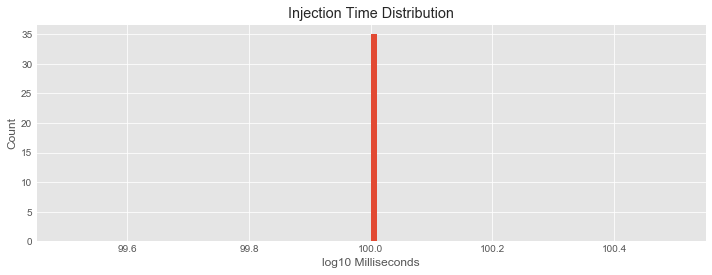

In [7]:
#funtion tom make the same plot
qc.Injection_plot(df_summary, 'Injection Time Distribution', TXT_PATH)

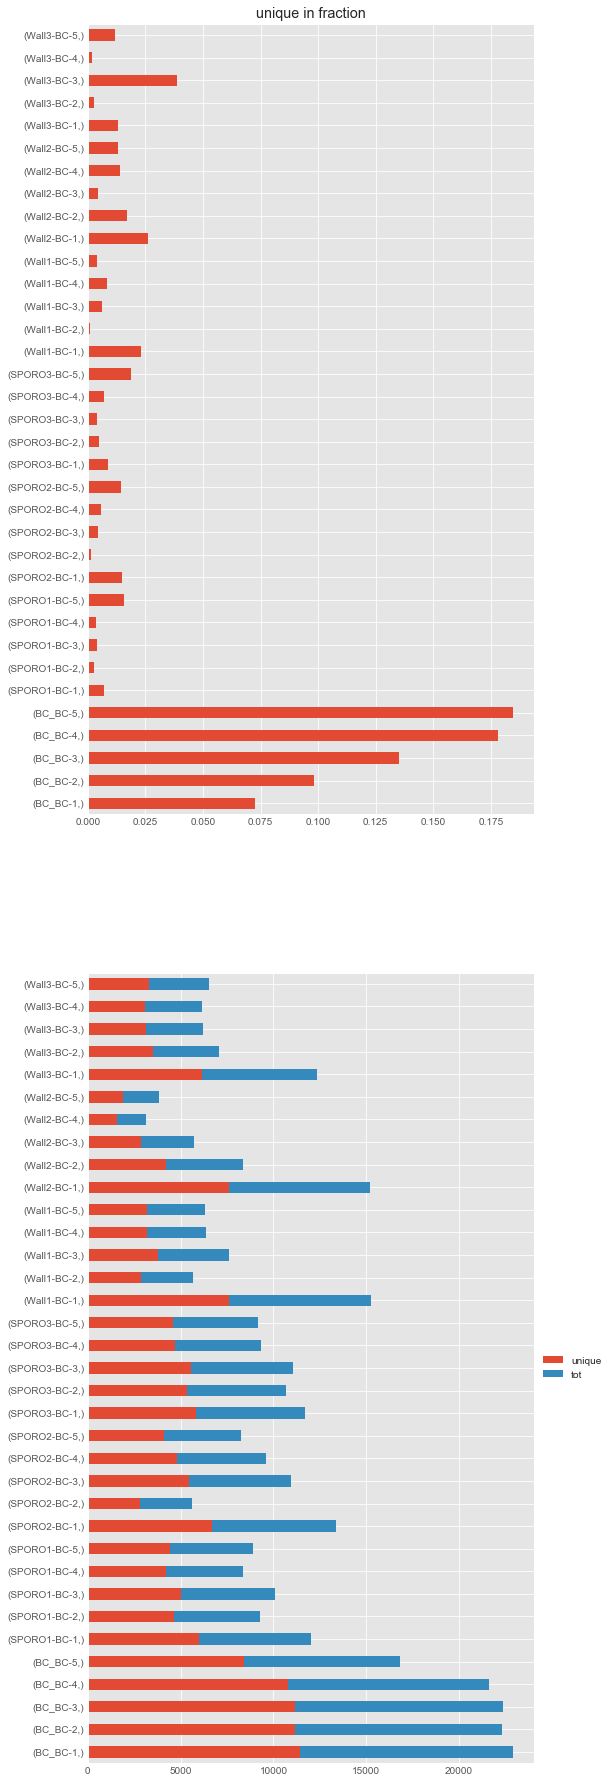

In [8]:
fig,axes=plt.subplots(ncols=1, nrows=2, figsize=(8,32))
qc.fractionation_report(msmsIdentified, axes, TXT_PATH)

BC_BC-1


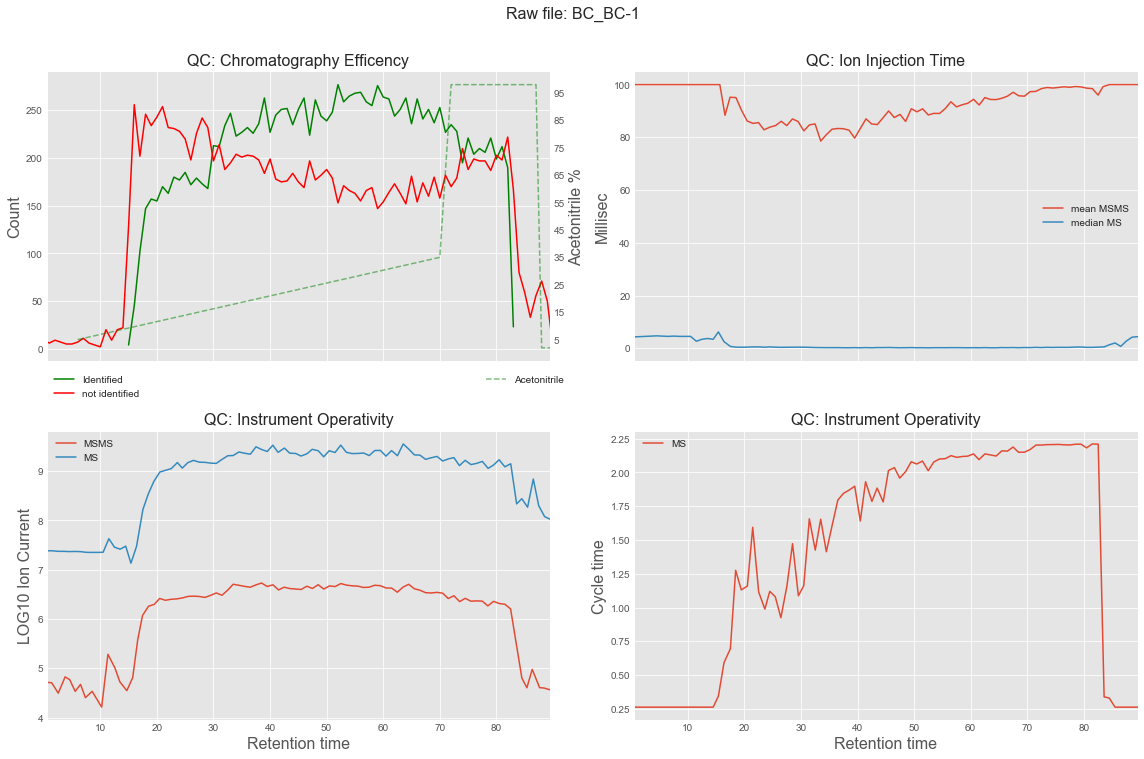

In [9]:
raw_list = list(df_summary['Raw file'].unique())
raw_list.remove('Total')
for raw_file_name in raw_list:
        print(raw_file_name)
        minutes, b_values = qc.extract_gradient(os.path.join(RAW_FILE_PATH,raw_file_name+'.raw'))
        tempMSdf=msScans[msScans['Raw file']==raw_file_name.split('.')[0]]
        tempMSMSdf=msmsScans[msmsScans['Raw file']==raw_file_name.split('.')[0]]
        qc.plot_raw_file(tempMSdf,tempMSMSdf, raw_file_name, gradient = (minutes, b_values))
        plt.tight_layout()
        plt.suptitle('Raw file: '+raw_file_name,fontsize=16,y=1.05)
        plt.savefig(os.path.join(TXT_PATH, raw_file_name+'.png'))
        plt.show()
        break

## Load and clean dataset
We load the MaxQuant output for:
- the firsth batch (WALL0) 
- the second batch (WALL1-3, SPORO1-3)

We analise protein/protein groups with a minimum of two unique peptide identified.

In [72]:
df = pd.read_csv(os.path.join(TXT_PATH, 'proteinGroups.txt'),sep='\t')
df = PTUT.clean_df(df, score=5, unique_pep_threshold=2)
df = PTUT.mod_df(df)
print(df.shape)
df.head()

starting from: (1999, 95)
removed  80 Protein Groups by: Only identified by site
tot  80  entries removed
---------------
removed  19 Protein Groups by: Reverse
tot  99  entries removed
---------------
removed  53 Protein Groups by: Potential contaminant
tot  152  entries removed
---------------
removed  293 Protein Groups by: Score
tot  445  entries removed
---------------
removed  46 Protein Groups by: Peptide counts (unique)
tot  491  entries removed
---------------
(1508, 98)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,desc
0,cgd1_1060-RA-p1,cgd1_1060-RA-p1,21,21,21,cgd1_1060-RA-p1 | transcript=cgd1_1060-RA | ge...,1,21,21,21,...,True;True;True;True;True;True;True;True;True;T...,2797;4358;4865;4866;5272;5273;6096;6880;6888;8...,24023;36586;36587;36588;36589;36590;36591;3993...,26392;40338;40339;40340;40341;40342;40343;4395...,26392;40341;43955;46081;46084;54198;61462;6148...,0;1;2;3,457;563;567;936,21,cgd1_1060-RA-p1,Uncharacterized protein with Armadillo-type fold
1,cgd1_1080-RA-p1,cgd1_1080-RA-p1,10,10,10,cgd1_1080-RA-p1 | transcript=cgd1_1080-RA | ge...,1,10,10,10,...,True;True;True;True;True;True;True;True;True;True,5810;6222;9063;12703;14937;17711;18540;19099;1...,46870;46871;46872;46873;46874;46875;50218;5021...,51599;51600;51601;51602;51603;51604;55320;5532...,51600;55320;80477;110700;128094;151642;159233;...,NaN,NaN,10,cgd1_1080-RA-p1,Alpha beta hydrolase
2,cgd1_110-RA-p1,cgd1_110-RA-p1,3,3,3,cgd1_110-RA-p1 | transcript=cgd1_110-RA | gene...,1,3,3,3,...,True;True;True,5939;14133;14603,47958;110325;113623,52822;121518;125077,52822;121518;125077,NaN,NaN,3,cgd1_110-RA-p1,Signal peptide region containing protein
3,cgd1_1110-RA-p1,cgd1_1110-RA-p1,5,5,5,cgd1_1110-RA-p1 | transcript=cgd1_1110-RA | ge...,1,5,5,5,...,True;True;True;True;True,4800;7943;17159;19845;24790,39636;64742;64743;64744;64745;64746;133555;154...,43654;71378;71379;71380;71381;71382;147019;170...,43654;71382;147019;170254;212345,4,12,5,cgd1_1110-RA-p1,Phosphatidyl serine synthase
4,cgd1_1140-RA-p1,cgd1_1140-RA-p1,10,10,10,cgd1_1140-RA-p1 | transcript=cgd1_1140-RA | ge...,1,10,10,10,...,True;True;True;True;True;True;True;True;True;True,8570;8708;12560;13000;16500;16501;20347;22383;...,69782;69783;69784;69785;69786;71121;71122;7112...,76833;76834;76835;76836;76837;78277;78278;7827...,76834;78277;109975;112677;141494;141496;175403...,5;6,58;73,10,cgd1_1140-RA-p1,Acyl-CoA-binding protein ACBP with Ankyrin repeat


In [78]:
#list(df.columns)

## Extract Intensity Values
Let's have a look at the intensity values

In [74]:
#color palette
palette=['b','b','b','g','g','r','r','r',]
palette_g = ['r','b']
color_dictionary = { 'b':'SPORO','r':'WALL', 'g':'?'}

In [ ]:
#cols 
#['Sequence coverage {sample} [%]'.format(sample=n) for n in columns]

In [76]:
#tag ='MS/MS count'
#tag ='iBAQ'
#tag ='LFQ intensity'
tag ='Intensity'
cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL0',' WALL1', ' WALL2',' WALL3']
cols = [tag+n for n in cols]
selection = df[cols]
selection.columns = [n.split(' ')[-1] for n in cols]
print(selection.shape)
selection = selection[(selection.T != 0).any()]
print(selection.shape)
selection.describe()

(1508, 7)
(1507, 7)


,SPORO1,SPORO2,SPORO3,WALL0,WALL1,WALL2,WALL3
count,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03
mean,4.198897e+08,5.030207e+08,6.548912e+08,6.868985e+09,1.163329e+08,1.105618e+08,8.162112e+07
std,7.817485e+09,9.901953e+09,1.204144e+10,4.483961e+10,5.602164e+08,5.748900e+08,4.151202e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.103450e+08,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.223300e+06,5.250200e+06,7.504700e+06,5.461900e+08,3.221000e+06,3.131700e+06,1.661400e+06
75%,4.536750e+07,5.184200e+07,7.375200e+07,2.975550e+09,3.168750e+07,2.884550e+07,2.247250e+07
max,2.989900e+11,3.791100e+11,4.597100e+11,1.444800e+12,1.334700e+10,1.447600e+10,1.016500e+10


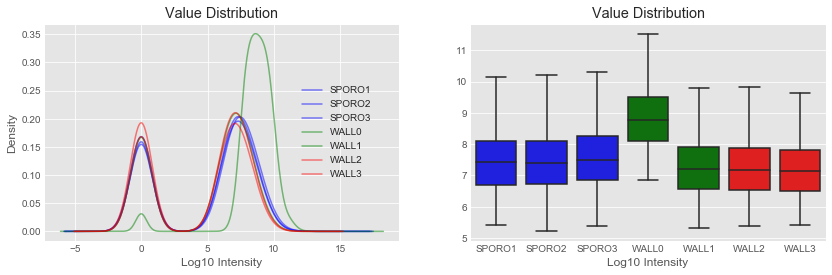

In [77]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(14,4))

np.log10(selection+1).plot(kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join(TXT_PATH, 'value_distribution.png'))
plt.show()

### Notes
The intesity values of the first run are on average 2 log higher than the most recent run

## Missing Data Analysis
### firsth and second batch

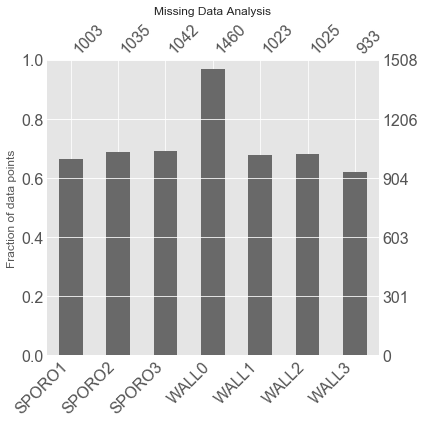

In [62]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan),figsize=(6, 6))
plt.title('Missing Data Analysis',size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.tight_layout()
plt.show()

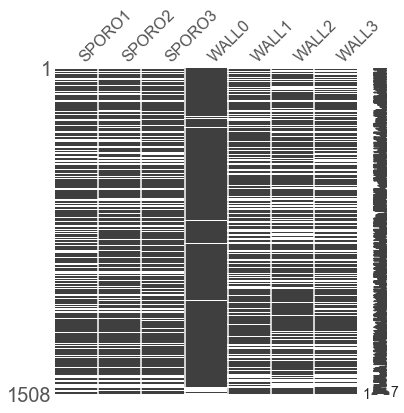

In [63]:
#print(data.shape)
msno.matrix(selection.replace(0,np.nan), figsize=(6, 6))
plt.show()

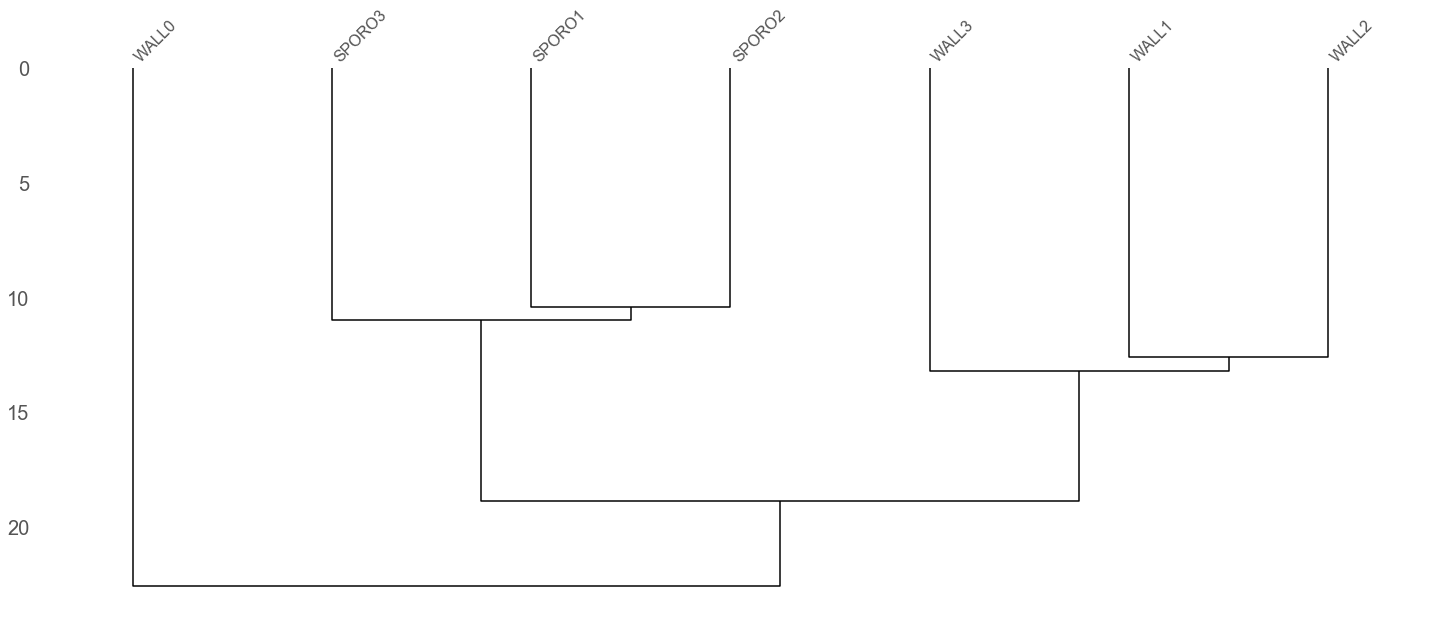

In [64]:
msno.dendrogram(selection.replace(0,np.nan))
plt.show()

All data point missing in SPORO
(63, 2)
All data point missing in WALL
(101, 2)


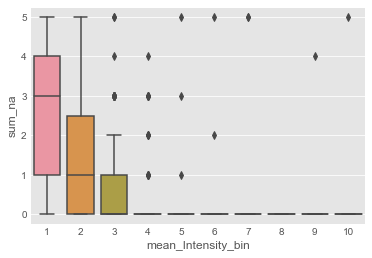

,SPORO,WALL,avg_intensity_SPORO,avg_intensity_WALL,mean_Intensity,sum_na,mean_Intensity_bin,sum_na_bin
0,0,0,3.000000,7.333333,0.865301,0,4,1
1,0,0,4.000000,8.666667,0.937852,0,4,1
2,3,3,NaN,NaN,NaN,6,NaN,10
3,0,0,5.666667,2.666667,0.425969,0,2,1
4,0,0,4.000000,3.333333,0.522879,0,2,1


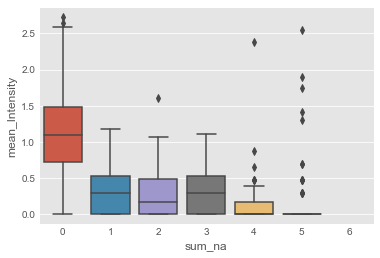

In [65]:
groups = {
    'SPORO':['SPORO1','SPORO2','SPORO3'],
    'WALL':['WALL1', 'WALL2','WALL3']}
series_list = [] 
for group in groups:
    count_na = selection[groups[group]].replace(0,np.nan).isna().sum(axis=1)
    count_na.name=group
    series_list.append(count_na)

count_na = pd.concat(series_list, axis=1)
for group in groups:
    print('All data point missing in',group)
    print(count_na[(count_na[group]==len(groups[group])) &
                   (selection.replace(0,np.nan).notna().sum(axis=1)>len(groups[group]))].shape)

#df.loc[count_na[(count_na['con']==5) & (count_na['ind']<1)].index.values][
#    ['Protein IDs','Protein names']+s_headers+w_headers].head()

for group in groups:
    count_na['avg_intensity_'+group]=selection[groups[group]].replace(0,np.nan).mean(skipna=True,axis=1)
    #count_na['avg_intensity_'+group] = np.log10(count_na['avg_intensity_'+group])

count_na['mean_Intensity']=count_na[['avg_intensity_'+group for n in groups]].mean(skipna=True,axis=1)
count_na['mean_Intensity']=np.log10(count_na['mean_Intensity'])
count_na['sum_na']=count_na[[n for n in groups]].sum(skipna=True,axis=1)

count_na['mean_Intensity_bin'] = pd.cut(count_na['mean_Intensity'],10,labels=range(1,11))
count_na['sum_na_bin'] = pd.cut(count_na['sum_na'],10,labels=range(1,11))
sns.boxplot(x='mean_Intensity_bin',y='sum_na',data=count_na)
plt.show()
sns.boxplot(x='sum_na',y='mean_Intensity',data=count_na)
count_na.head()#.sum(skipna=True,axis=1)

In [ ]:
'''
temp_1 = df[control_headers].replace(0,np.nan).mean(skipna=True,axis=1)
temp_1.name='Intensity_SPORO'
temp_2 = df[senecent_headers].replace(0,np.nan).mean(skipna=True,axis=1)
temp_2.name='Intensity_WALL'
temp_3=pd.concat([count_na, temp_1, temp_2],axis=1)
temp_3['Intensity_SPORO']=np.log10(temp_3['Intensity_SPORO'])
temp_3['Intensity_WALL']=np.log10(temp_3['Intensity_WALL'])
temp_3['Intensity']=temp_3[['Intensity_SPORO','Intensity_WALL']].mean(skipna=True,axis=1)
temp_3['nacount']=temp_3[['con','ind']].sum(axis=1)
temp_3=temp_3[temp_3['nacount']<10]
#temp_3.plot(x='Intensity_ind',y='ind',kind='scatter')
sns.boxplot(x='nacount',y='Intensity',data=temp_3)
'''

### Notes
the first batch identified most of the proteins

In [ ]:
"£$%^&*()!{}@~:?><,./#';\'"
index = df[df['Protein IDs'].str.startswith('tr|')].index.values
msno.matrix(selection.loc[index].replace(0,np.nan), figsize=(6, 6))
#print (df.loc[1892]['Fasta headers'])
print(selection.loc[index].replace(0,np.nan).head(5))
print(selection.loc[index].replace(0,np.nan).isna().sum())
selection.loc[index].replace(0,np.nan).isna().sum()/selection.replace(0,np.nan).notna().sum()*100


In [ ]:
msno.dendrogram(selection.loc[index].replace(0,np.nan))
plt.show()

### Second batch only

In [ ]:
#print(data.shape)
temp = selection.copy()
temp = temp[['SPORO1','SPORO2','SPORO3','WALL1', 'WALL2','WALL3']]
temp = temp[(temp.T != 0).any()]
temp = temp.replace(0,np.nan)
print (temp.head())
msno.matrix(temp, figsize=(6, 6))
plt.show()

In [ ]:
ax=msno.bar(temp.replace(0,np.nan),figsize=(6, 6))

In [ ]:
#list(df.columns)

In [ ]:
df[df['Gene_id']=='cgd4_3090-RA-p1'][['Intensity WALL1', 'Intensity WALL2', 'Intensity WALL3']]

In [ ]:
sporo_nan = selection[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).isna().sum(axis=1)
wall_nan  = selection[['WALL1','WALL2','WALL3']].replace(0,np.nan).isna().sum(axis=1)
only_wall = selection[(sporo_nan==3) & (wall_nan<3)]
only_sporo = selection[(sporo_nan<3) & (wall_nan==3)]
print(' Found only in Wall:',only_wall.shape[0],'\n',
      'Found only in Sporo:',only_sporo.shape[0])

In [ ]:
#df.head()

### Most aboundand found only in SPORO

In [ ]:
cols=['LFQ intensity SPORO1', 'LFQ intensity SPORO2', 'LFQ intensity SPORO3',
      'LFQ intensity WALL1', 'LFQ intensity WALL2', 'LFQ intensity WALL3','LFQ intensity WALL0']

to_look = only_sporo.sort_values('SPORO1', ascending=False).index.values
temp = df.loc[to_look][['Protein IDs','desc','Score','Peptide counts (unique)']+cols]
temp['median_sporo'] = temp[['LFQ intensity SPORO1', 
                             'LFQ intensity SPORO2', 
                             'LFQ intensity SPORO3']].replace(0,np.nan).median(axis=1,skipna=True )
temp=temp.sort_values('median_sporo', ascending=False)
temp.to_csv(os.path.join(TXT_PATH, 'only_sporo.csv'))
temp.head()

### Most aboundand found only in WALL

In [ ]:
to_look = only_wall.sort_values('WALL1',ascending=False).index.values[0:5]
df.loc[to_look][['Protein IDs','desc']]

In [ ]:
to_look = only_wall.sort_values('WALL1', ascending=False).index.values
cols = [ 'LFQ intensity WALL0',
        'LFQ intensity WALL1', 
        'LFQ intensity WALL2',
        'LFQ intensity WALL3']
temp = df.loc[to_look][['Protein IDs','desc']+cols]
temp['median_wall'] = temp[cols[1:]].replace(0,np.nan).median(axis=1,skipna=True )
temp=temp.sort_values('median_wall', ascending=False)
temp.to_csv(os.path.join(TXT_PATH, 'only_wall.csv'))
temp.head()

## QC

### Chromatography
#### SPORO1
![title](static/SPORO1-BC-1.png)

#### WALL 1st submission
![title](static/BC_BC-1.png)

## Peptide x Protein group

In [ ]:
peptide_diff = df['Peptides WALL0']-df['Peptides WALL1']
peptide_diff.plot(kind='hist',bins=20)
plt.show()

In [ ]:
peptide_diff = df['Peptides WALL0']-df['Peptides SPORO1']
peptide_diff.plot(kind='hist',bins=20)
plt.show()

## Batch similarity

In [ ]:
#selection.replace(0,np.nan).dropna().corr('spearman')

In [ ]:
temp = np.log10(selection.replace(0,np.nan).dropna())
for n in temp.columns:
    ccc= PTUT.concordance_correlation_coefficient(temp['WALL0'].values, temp[n].values)
    print(n,ccc)
np.log10(selection.replace(0,np.nan).dropna()).corr(PTUT.concordance_correlation_coefficient)

### Switch to Lfq

In [ ]:
#tag ='Intensity'
#tag ='iBAQ'
tag ='LFQ intensity'

cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL0',' WALL1', ' WALL2',' WALL3']
cols = [tag+n for n in cols]
selection = df[cols]
selection.columns = [n.split(' ')[-1] for n in cols]
print(selection.shape)
selection = selection[(selection.T != 0).any()]
print(selection.shape)
selection.describe()

In [ ]:
plt.style.use('ggplot')
fig,ax=plt.subplots()
PTUT.make_mds(np.log10(selection.replace(0,np.nan).dropna()),
              palette=palette,ax=ax,do_adjust_text=True)
plt.show()

In [ ]:
#selection.head()

In [ ]:
fig,ax=plt.subplots()
PTUT.make_pca(np.log10(selection.replace(0,np.nan).dropna()),
                       palette=palette,ax=ax,do_adjust_text=True)
plt.show()

In [ ]:
#g = sns.pairplot(np.log10(selection.replace(0,np.nan)).dropna().sample(500))
#plt.savefig(os.path.join(TXT_PATH,'corr_pairplot.png'))
#plt.show()

### Coefficent of variation

In [ ]:
con_columns = ['SPORO1', 'SPORO2', 'SPORO3']
ind_columns= ['WALL1', 'WALL2', 'WALL3']

import seaborn as sns
cv = selection.copy()
cv = cv.dropna()
cv['mean_c'] = cv[con_columns].mean(axis=1)
cv['std_c'] = cv[con_columns].std(axis=1)

cv['mean_i'] = cv[ind_columns].mean(axis=1)
cv['std_i'] = cv[ind_columns].std(axis=1)

cv['SPORO_cv'] = cv['std_c']/cv['mean_c']
cv['WALL_cv'] = cv['std_i']/cv['mean_i']

fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=cv[['SPORO_cv','WALL_cv']],palette=palette_g,
            showfliers=False,ax=ax)
#plt.savefig(os.path.join('Fig_S3A_cv.png'))
plt.savefig(os.path.join(TXT_PATH,'cv.png'))
plt.show()

### Coefficent of variation and intensity

In [ ]:
cv.plot(x='mean_c',y='SPORO_cv',kind='scatter',marker='.')
plt.xscale('log')
plt.show()
cv.plot(x='mean_i',y='WALL_cv',kind='scatter',marker='.')
plt.xscale('log')
plt.show()

## Find differential expressed proteins

## Visualise Wall Markers

In [ ]:
controls = ['cgd6_2090-RA-p1', 'cgd6_200-RA-p1', 'cgd4_3090-RA-p1']

In [ ]:
#tag ='Intensity'
#tag ='iBAQ'
#tag ='LFQ intensity'

#protein desc dictionary
desc_dict= dict(zip(df['Gene_id'],df['desc']))
def plot_prot(gene,log=True,tag='LFQ intensity'):
    cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL0',' WALL1', ' WALL2',' WALL3']
    cols = [tag+n for n in cols]
    temp = df[df['Fasta headers'].str.contains(gene)][cols]
    temp.columns = [n.split(' ')[-1] for  n in temp.columns]
    if log:
        temp=np.log10(temp)
    sns.barplot(data=temp,palette=palette)#.plot(kind='bar',color=palette)
    plt.title(gene)
    plt.show()
    print(desc_dict[gene])
    #print(temp_PolySTest.loc[gene][['log2fc','log10meanInt']])


In [ ]:
for prot in controls:
    plot_prot(prot, log=True, tag='iBAQ')

## ProtRank

In [ ]:
indata_prank = selection[['SPORO1', 'SPORO2', 'SPORO3',  'WALL1', 'WALL2', 'WALL3']]
indata_prank.head()

In [ ]:
## replace prot

In [ ]:
indata_prank = selection[['SPORO1', 'SPORO2', 'SPORO3',  'WALL1', 'WALL2', 'WALL3']]
#indata_prank=indata_prank.replace(0,np.nan)
#indata_prank=indata_prank.fillna(indata_prank.min())
indata_prank=indata_prank.join(df[['Gene_id']],how='left')
indata_prank.set_index('Gene_id',drop=True,inplace=True)
indata_prank.to_csv(os.path.join(TXT_PATH, 'indata_ProtRank.csv'))
indata_prank.head()

In [ ]:
what_to_compare = [[['WALL1', 'SPORO1' ], ['WALL2', 'SPORO2' ], ['WALL3', 'SPORO3' ]]]
ProtRank.data_stats(indata_prank, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SPORO_vs_WALL'
significant_proteins = ProtRank.rank_proteins(indata_prank, what_to_compare, description,
                                              path_to=TXT_PATH)

In [ ]:
temp_1 = pd.read_csv(os.path.join(TXT_PATH,'prs-SPORO_vs_WALL.dat'),
                   sep='\t', comment='#', index_col=[1],
                   names=['id','rank','FDR','sign'])
temp_1['log_FDR']=-np.log10(temp_1['FDR']+0.00009)
temp_1['log_rank']=np.log10(temp_1['rank'])
temp_1['srank']=[n*1 if a=='+' else n*-1 for n,a in zip(temp_1['rank'],temp_1['sign'])]
temp_1['desc']=[desc_dict[n] for n in temp_1.index.values]
temp_1.plot(kind='scatter',x='srank',y='log_FDR',marker='.')
print(temp_1.shape)
temp_1 = temp_1.join(df.set_index('Gene_id')[['Score', 'Peptide counts (unique)']],how='left')
print(temp_1.shape)
temp_1.to_csv(os.path.join(TXT_PATH,'prank_out.csv'))

In [ ]:
temp_1.head()

In [ ]:
plt.style.use('ggplot')
temp = temp_1[(temp_1['srank']>14) & 
                                (temp_1['FDR']<0.01) 
                     ]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1[temp_1['srank']>14],#[temp_PolySTest['log10meanInt']>9], 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcan Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

sporo_nan = indata_prank[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).isna().sum(axis=1)
wall_nan  = indata_prank[['WALL1','WALL2','WALL3']].replace(0,np.nan).isna().sum(axis=1)
only_wall = indata_prank[(sporo_nan==3) & (wall_nan<3)]
only_sporo = indata_prank[(sporo_nan<3) & (wall_nan==3)]
min_sporo = indata_prank[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).min()
min_wall = indata_prank[['WALL1','WALL2','WALL3']].replace(0,np.nan).min()
mask_wall = only_wall[['WALL1','WALL2','WALL3']].replace(0,np.nan).isna()
mask_sporo = only_sporo[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).isna()
mask_wall.columns = ['SPORO1','SPORO2','SPORO3']
mask_sporo.columns = ['WALL1','WALL2','WALL3']
only_wall[['SPORO1','SPORO2','SPORO3']] = only_wall[
    ['SPORO1','SPORO2','SPORO3']][mask_wall].fillna(min_sporo)
only_sporo[['WALL1','WALL2','WALL3']] = only_sporo[
    ['WALL1','WALL2','WALL3']][mask_sporo].fillna(min_wall)
filled_df = pd.concat([only_wall,only_sporo])
filled_df.head()
indata_prank.loc[filled_df.index.values,:]=filled_df

### Where are histones?

In [ ]:
temp=pd.read_csv('static\\CriptoDB\\histone.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_1.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]


fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1, 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Where are Walls ?

In [ ]:
temp=pd.read_csv('static\\CriptoDB\\wall.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_1.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]


fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1, 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Where are Nucleolar?

In [ ]:
temp=pd.read_csv('static\\CriptoDB\\nucleolar.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_1.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]


fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1, 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Where are nuclear pore proteins?

In [80]:
??PTUT.make_vulcano

In [ ]:
temp=pd.read_csv('static\\CriptoDB\\nuclear_pore.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_1.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]


fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1, 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

In [ ]:
temp=pd.read_csv('static\\CriptoDB\\wall_proteomics.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_1.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]


fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1, 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=False,
                  do_adjust_text=False,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

In [ ]:
temp=pd.read_csv('static\\CriptoDB\\Mitochondrial_proteome.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_1.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]


fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1, 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=False,
                  do_adjust_text=False,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Enriched

In [ ]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']>5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=False,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Zoom on enriched

In [ ]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']>5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['log2fc']>3], 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

In [ ]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']>5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['log2fc']>3], 
                  axes, x='log10meanInt', y='log2fc', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

In [ ]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']<-5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['log2fc']<-3], 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

In [ ]:
indf = pd.read_csv(os.path.join(RAW_FILE_PATH, TXT_PATH, 'evidence.txt'), sep='\t')
indf['logIntensity']=np.log1p(indf['Intensity'])
indf=indf[~indf['Raw file'].str.contains('BC_BC')]
indf['Raw_code'] = [n.split('-')[0][0]+n.split('-')[0][-1]+n.split('-')[-1] for n in indf['Raw file']]
print(list(indf.columns))
indf['Intensity'].head()

In [ ]:
fig,ax=plt.subplots(figsize=(16,4))
temp = indf[indf['Proteins']=='cgd7_3120-RA-p1'][['Raw_code','logIntensity']]
sns.boxplot(data=temp,x='Raw_code', 
            y='logIntensity',ax=ax)

In [ ]:

#sns.boxplot(data=temp,x='Raw file',y='Intensity')

In [ ]:
indf.head()

In [ ]:
!jupyter nbconvert --to html_toc analysis.ipynb

In [ ]:
indf = pd.read_csv(os.path.join(RAW_FILE_PATH,TXT_PATH,'msmsScans.txt'),sep='\t')
indf.head()              

In [ ]:
indf[['m/z',
 'Mass',
 'Charge']].dropna().tail()

In [ ]:
indf = pd.read_csv(os.path.join(RAW_FILE_PATH,'BC_BC-1.tsv'),sep='\t')

In [ ]:
indf.massdiff.plot(kind='hist',bins=100)

In [ ]:
import pandas as pd
from tqdm import tqdm_notebook
import os
list_df = []
for file_name  in tqdm_notebook(os.listdir(RAW_FILE_PATH)):
    if file_name.endswith('.tsv') and file_name.startswith('SPORO'):
        indf = pd.read_csv(os.path.join(RAW_FILE_PATH,file_name),sep='\t')
        indf['fname']=file_name
        list_df.append(indf)
list_df=pd.concat(list_df)
list_df.massdiff.plot(kind='hist',bins=100)

In [ ]:
list_df[(list_df.massdiff>10) & (list_df.massdiff<100)].massdiff.plot(kind='hist',bins=200,figsize=(16,4))

In [ ]:
import pandas as pd
from tqdm import tqdm_notebook
import os
list_df = []
for file_name  in tqdm_notebook(os.listdir(RAW_FILE_PATH)):
    if file_name.endswith('.tsv') and file_name.startswith('Wall'):
        indf = pd.read_csv(os.path.join(RAW_FILE_PATH,file_name),sep='\t')
        indf['fname']=file_name
        list_df.append(indf)
list_df=pd.concat(list_df)
list_df[(list_df.massdiff>10) & (list_df.massdiff<100)].massdiff.plot(kind='hist',bins=50,figsize=(16,4))

In [ ]:
indf = pd.read_csv(os.path.join(RAW_FILE_PATH, TXT_PATH, 'msms.txt'),sep='\t',nrows=10)
indf.head()

In [ ]:
#list(indf.columns)